# Heart Disease Prediction 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# EDA

In [37]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [38]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [39]:
df.shape

(920, 16)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [41]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [42]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

finding the Mean,Median and Mode of data

In [43]:
col=['id','age','trestbps','chol','thalch','oldpeak','ca','num']
for i in col:
    print(f"{i} | Mean: {df[i].mean():.2f} | Mode: {df[i].mode()[0]} | Median: {df[i].median()}")



id | Mean: 460.50 | Mode: 1 | Median: 460.5
age | Mean: 53.51 | Mode: 54 | Median: 54.0
trestbps | Mean: 132.13 | Mode: 120.0 | Median: 130.0
chol | Mean: 199.13 | Mode: 0.0 | Median: 223.0
thalch | Mean: 137.55 | Mode: 150.0 | Median: 140.0
oldpeak | Mean: 0.88 | Mode: 0.0 | Median: 0.5
ca | Mean: 0.68 | Mode: 0.0 | Median: 0.0
num | Mean: 1.00 | Mode: 0 | Median: 1.0


making seperate categorical col

In [44]:
categorical_col=['dataset','cp','restecg','slope','thal']
for i in categorical_col:
    print(i,df[i].unique())

dataset ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
restecg ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
slope ['downsloping' 'flat' 'upsloping' nan]
thal ['fixed defect' 'normal' 'reversable defect' nan]


seperate numerical col

In [45]:
numerical_col=['trestbps','chol','thalch','oldpeak','ca','num']
for i in numerical_col:
    print(i,df[i].isnull().sum())

trestbps 59
chol 30
thalch 55
oldpeak 62
ca 611
num 0


# Data visualizations

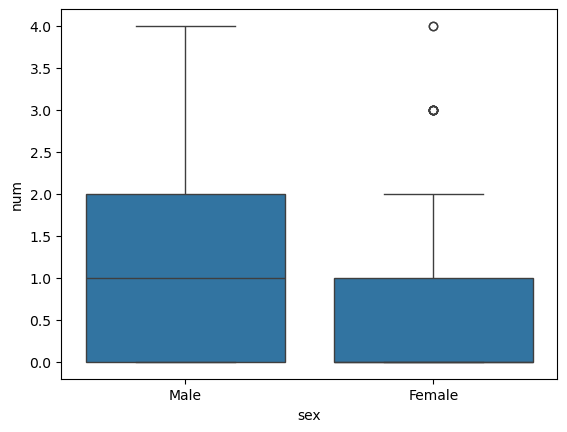

In [50]:
sns.boxplot(x='sex', y='num', data=df)
plt.show()


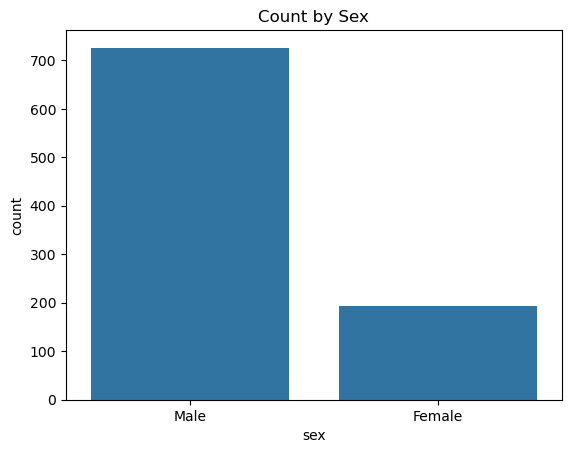

In [68]:
sns.countplot(x='sex', data=df)
plt.title('Count by Sex')
plt.show()


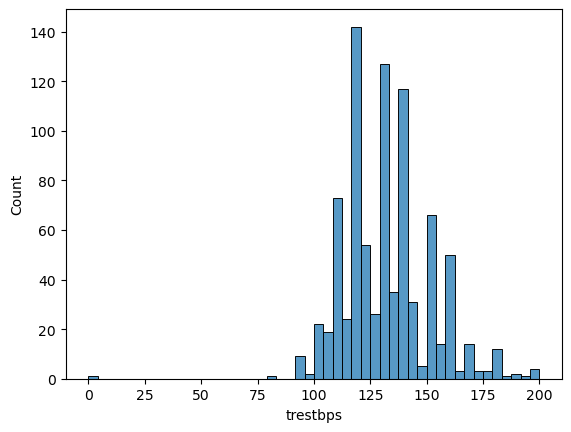

In [56]:
sns.histplot(df['trestbps'])
plt.show()

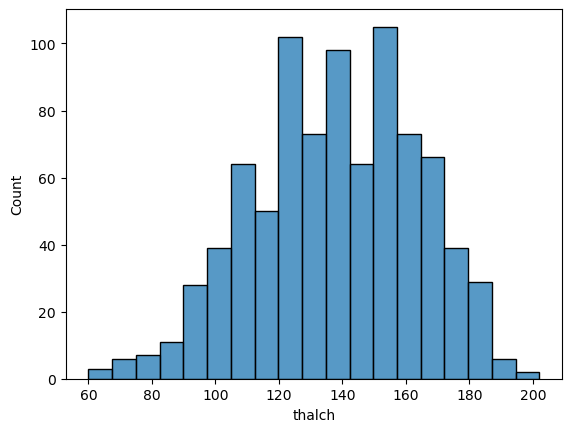

In [62]:
sns.histplot(df['thalch'])
plt.show()


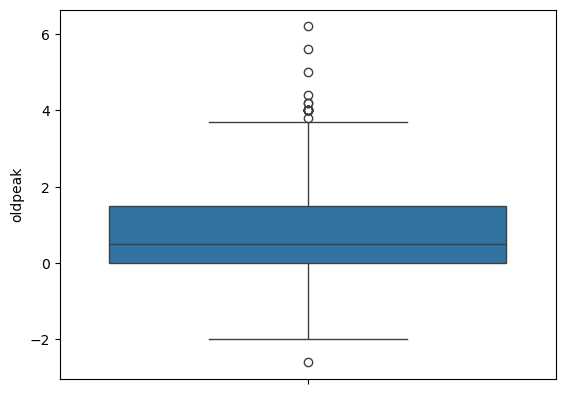

In [67]:
sns.boxplot(df['oldpeak'])
plt.show()

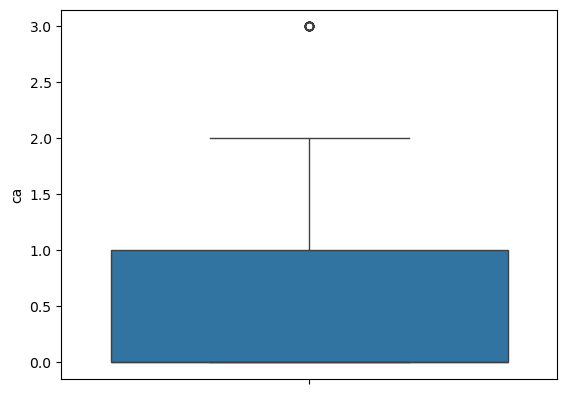

In [57]:
sns.boxplot(df['ca'])
plt.show()

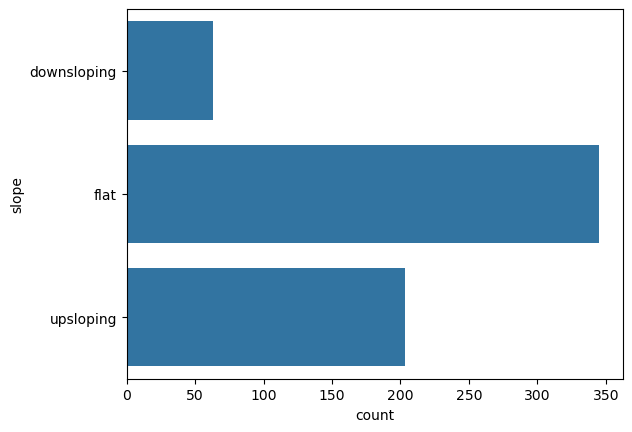

In [58]:
sns.countplot(df['slope'])
plt.show()

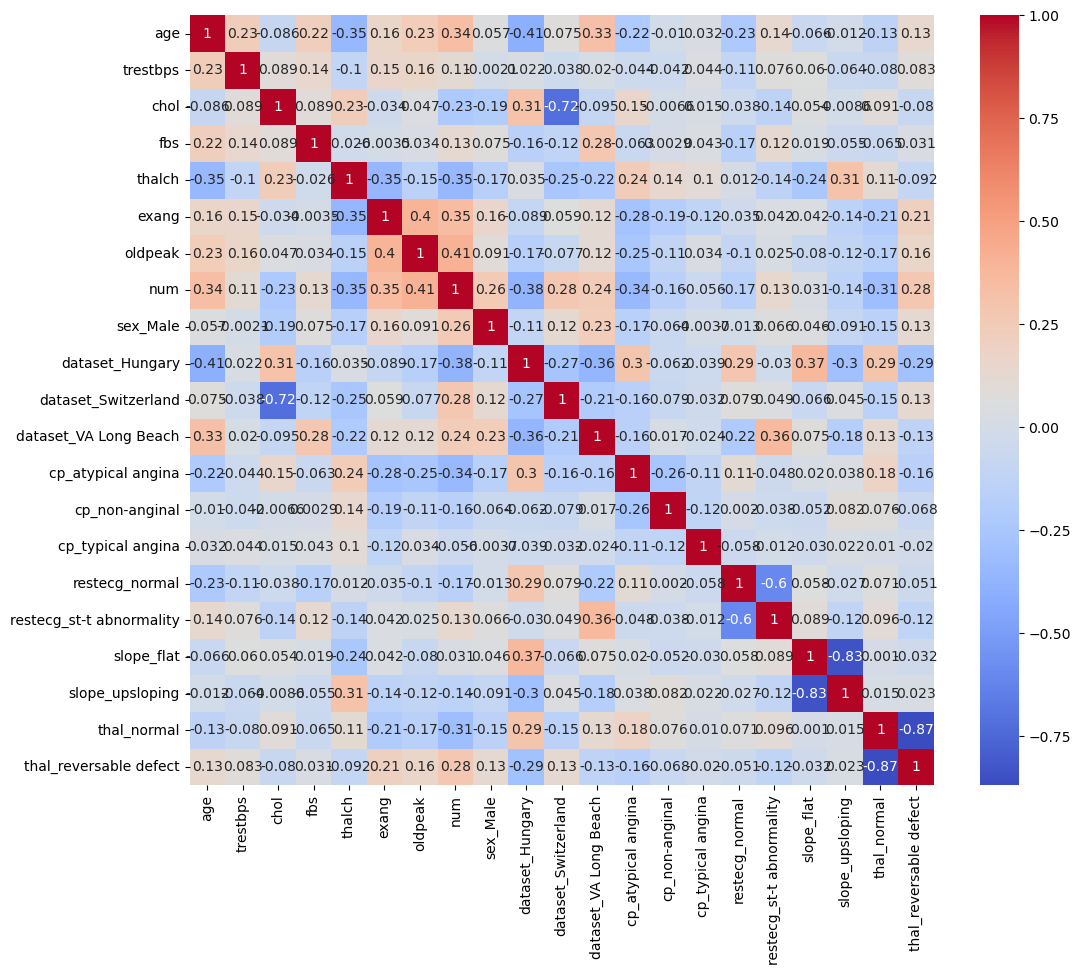

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

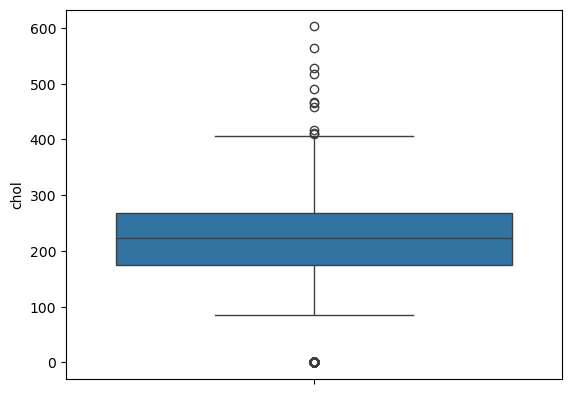

In [59]:
sns.boxplot(df['chol'])
plt.show()

# Data cleaning 

In [12]:
df = df.drop(columns=['ca','id'], axis=1)

filled all the NULL values to its Median

In [13]:
new_numerical_col=['trestbps','chol','thalch','oldpeak']
for i in new_numerical_col:
    df[i] = df[i].fillna(df[i].median())

Filled all the NULL values to its Mode

In [14]:
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for i in categorical_cols:
    df[i] = df[i].fillna(df[i].mode()[0])

C:\Users\Aditya Kumar\AppData\Local\Temp\ipykernel_12060\268618580.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].fillna(df[i].mode()[0])


using the get_dummies 

In [15]:
df = pd.get_dummies(df, drop_first=True,dtype=int)

X = df.drop('num', axis=1)
y = df['num']


In [16]:
y = (y > 0).astype(int)
# it changes the values of y(df['num]) which have values greater
# then 0 into True and negative into False

In [17]:
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,dataset_Hungary,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,True,150.0,False,2.3,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,67,160.0,286.0,False,108.0,True,1.5,2,1,0,...,0,0,0,0,0,0,1,0,1,0
2,67,120.0,229.0,False,129.0,True,2.6,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,37,130.0,250.0,False,187.0,False,3.5,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,False,172.0,False,1.4,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [18]:
df.shape

(920, 21)

# Training of Data 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# SVM

In [21]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced')
model.fit(X_train_scaled, y_train)


SVC(C=10, class_weight='balanced')

In [22]:
y_pred = model.predict(X_test_scaled)


Calculating the accuracy 

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8478260869565217
[[64 11]
 [17 92]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



Accuracy of Model is 84.78%